# Explore data

In [28]:
import pandas as pd
import numpy as np
from icecream import ic
import datetime
import glob

import re

In [29]:
data_prefixes = ["epidemilov", "coronapas", "tvangsvaccine"]

In [30]:
df = pd.DataFrame()

# Add our scrape
for data_prefix in data_prefixes[0:2]:
    filename = "../" + data_prefix + "_smoothed*.csv"
    df_temp = pd.read_csv(glob.glob(filename)[0])
    df_temp = df_temp.sort_values("created_at")
    ic(len(df_temp))
    df_temp["datatype"] = data_prefix
    
    df = pd.concat([df, df_temp])

ic| len(df_temp): 3626
ic| len(df_temp): 7622


In [31]:
# Add our scrape
filename = "../" + "tvangsvaccin" + "_smoothed*.csv"
df_temp = pd.read_csv(glob.glob(filename)[0])
df_temp = df_temp.sort_values("created_at")
ic(len(df_temp))
df_temp["datatype"] = "tvangsvaccine"
    
df = pd.concat([df, df_temp])

ic| len(df_temp): 1258


In [32]:
df["date"] = pd.to_datetime(df["date"])

## Tweet frequency over time

In [33]:
df.nr_of_tweets.describe()

count    12506.000000
mean       108.546618
std        166.507886
min          1.000000
25%         16.000000
50%         55.000000
75%        116.000000
max        730.000000
Name: nr_of_tweets, dtype: float64

In [34]:
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes
import datetime as dt

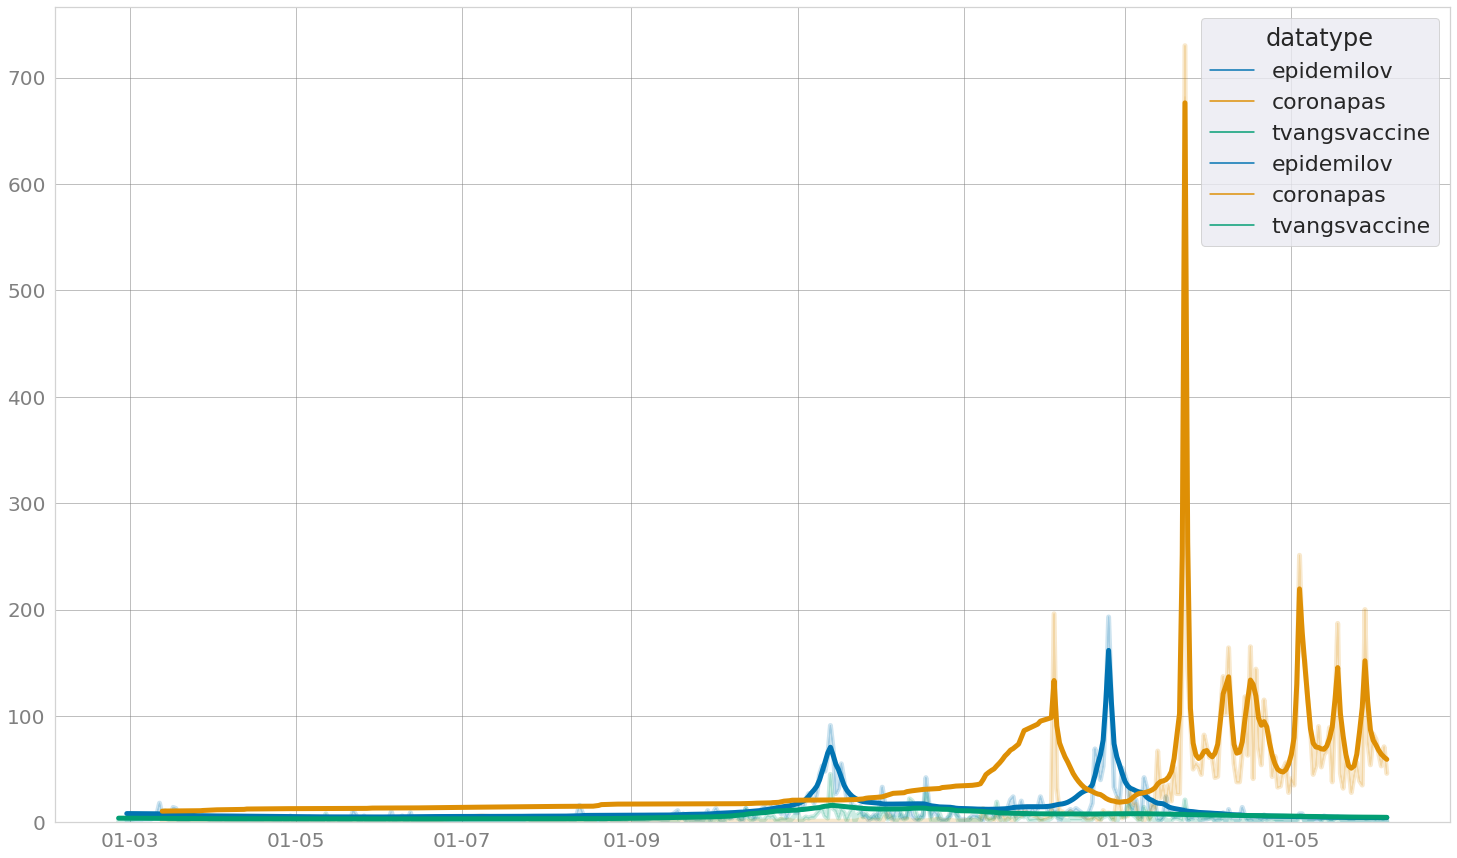

In [35]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)


ax2 = sns.lineplot(x="date", y="nr_of_tweets", 
                  palette = "colorblind", 
                   hue = "datatype",
                   alpha = 0.2,
                     linewidth = 5, data = df)

ax2 = sns.lineplot(x="date", y="s200_nr_of_tweets", 
                  palette = "colorblind", 
                   hue = "datatype",
                     linewidth = 5, data = df)


ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

ax1.set(ylim=(0, None))
#name = "Mentions of " + data_prefix + " by language"
#fig.suptitle(name, size = "40")

#plot_name = "fig/all_vaccin_mentions_winter.png"
#fig.savefig(plot_name)

fig.show()

/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


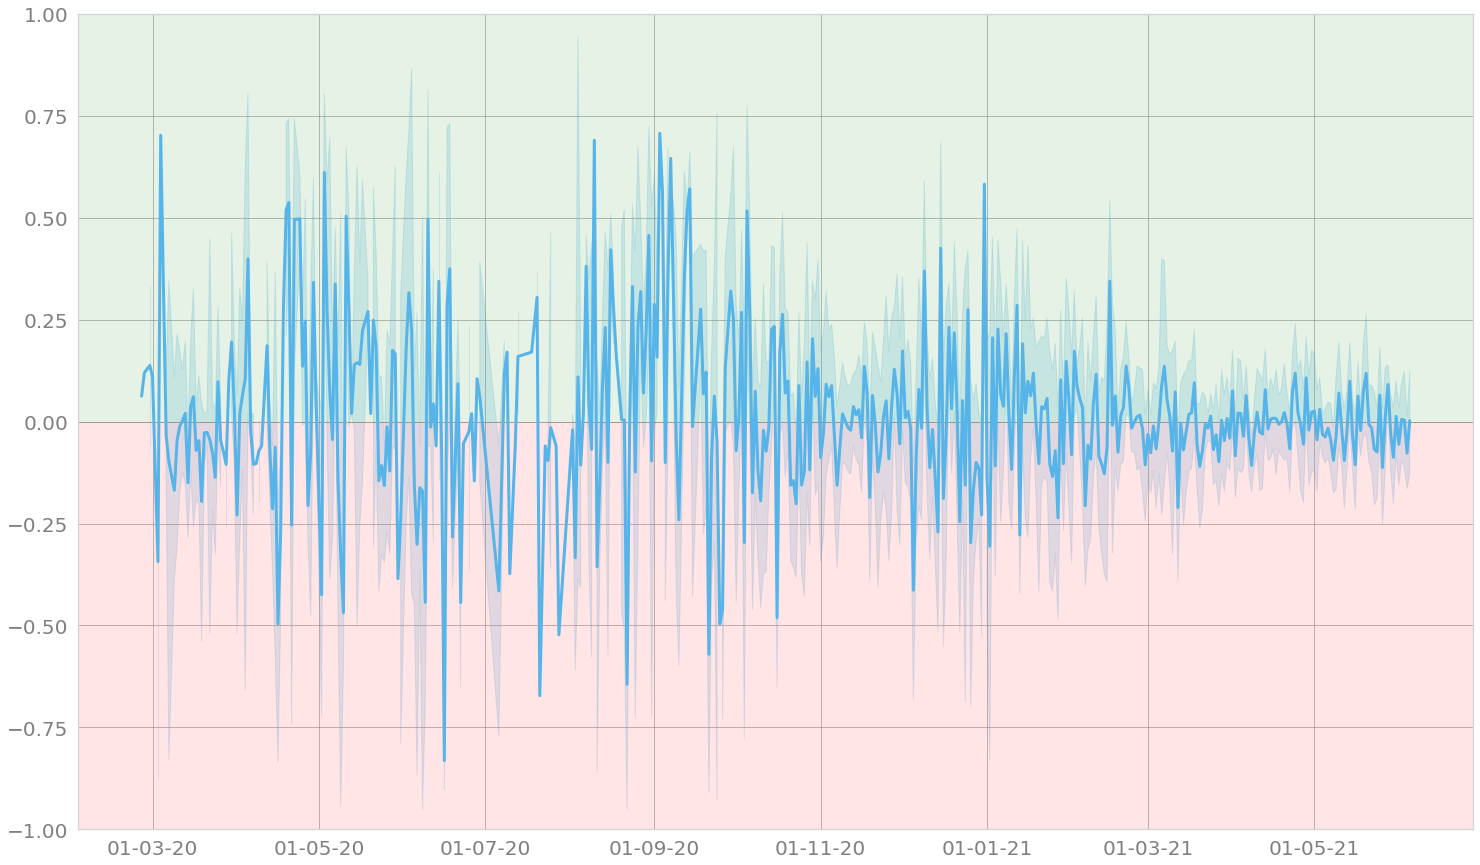

In [36]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
#          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]


fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.lineplot(x="date", y="centered_compound", 
                   color = palette[2],
                     linewidth = 3, data = df)

ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Color the bg
plt.axhspan(0, 1, color = "green", facecolor='0.2', alpha=0.1)
plt.axhspan(0, -1, color = "red", facecolor='0.2', alpha=0.1)

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m-%y")
ax1.xaxis.set_major_formatter(date_form)

#fig.suptitle("Sentiment analysis of mentions of 'vaccin*'. 2020 - 2021", size = "40")

#plot_name = "fig/sentiment_compound_entropy_winter.png"
#fig.savefig(plot_name)

ax1.set(ylim=(-1, 1))

fig.show()

/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


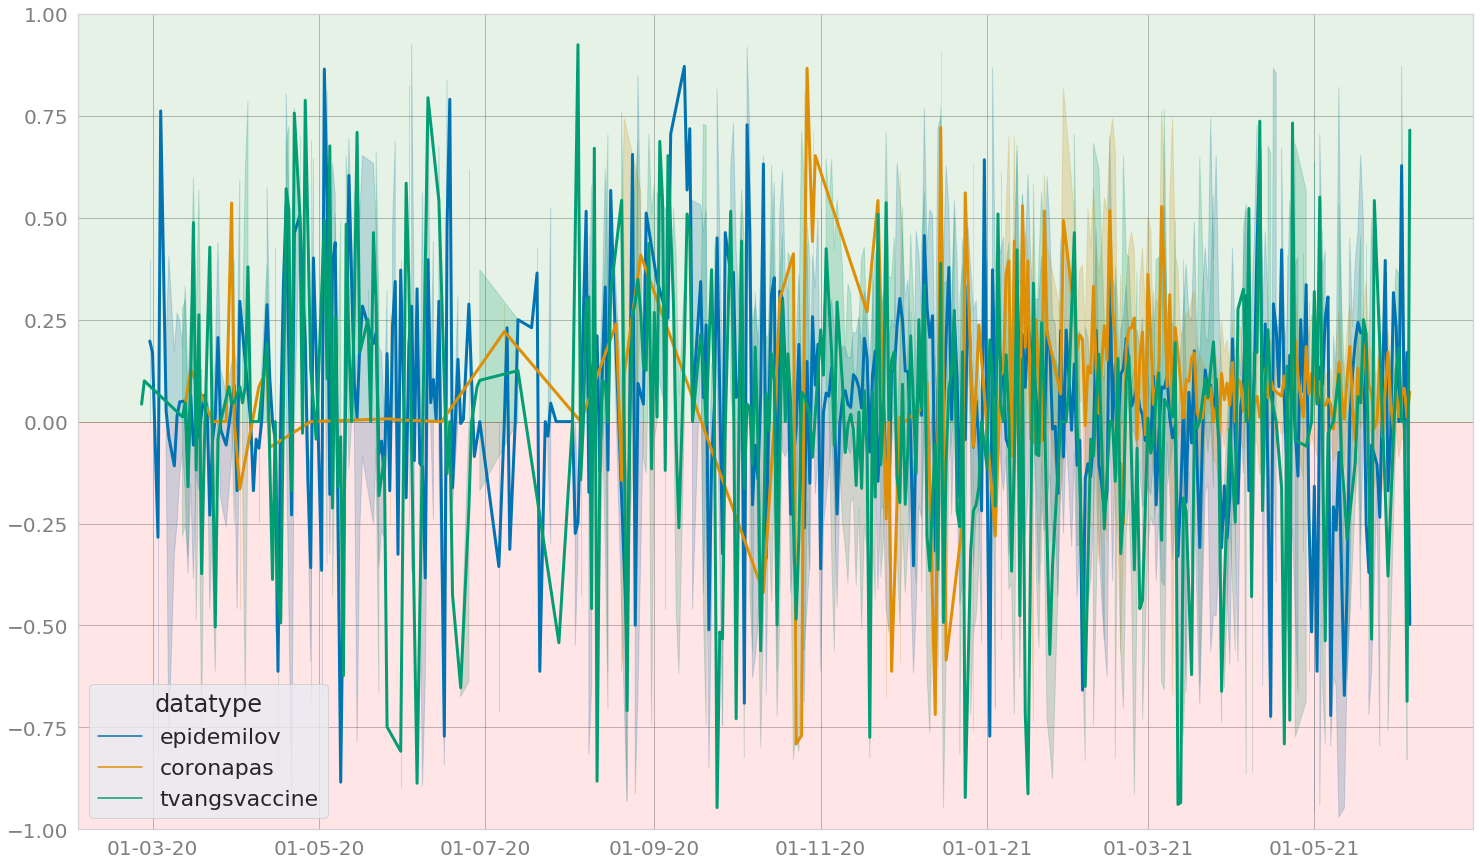

In [37]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
#          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]


fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.lineplot(x="date", y="compound", 
                   palette = "colorblind",
                   hue = "datatype",
                     linewidth = 3, data = df)

ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Color the bg
plt.axhspan(0, 1, color = "green", facecolor='0.2', alpha=0.1)
plt.axhspan(0, -1, color = "red", facecolor='0.2', alpha=0.1)

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m-%y")
ax1.xaxis.set_major_formatter(date_form)

#fig.suptitle("Sentiment analysis of mentions of 'vaccin*'. 2020 - 2021", size = "40")

#plot_name = "fig/sentiment_compound_entropy_winter.png"
#fig.savefig(plot_name)

ax1.set(ylim=(-1, 1))

fig.show()